Análise de Acidentes nas Rodovias Federais no ano de 2022

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
#Importando arquivo

data = pd.read_csv("Dataset/datatran2022.csv", low_memory=False, encoding="ISO-8859-1", on_bad_lines='skip', usecols = [1,2,4,5,9,11,13,17])
#Obs: Tive problemas na importação do arquivo original, dessa forma foi necessário adicionar os argumentos acima no read_csv

data.dtypes

data_inversa               object
dia_semana                 object
uf                         object
br                        float64
tipo_acidente              object
fase_dia                   object
condicao_metereologica     object
pessoas                     int64
dtype: object

In [4]:
print(data.head(5))

  data_inversa dia_semana  uf     br              tipo_acidente     fase_dia  \
0   01/01/2022     sábado  PI  316.0           Colisão traseira  Plena Noite   
1   01/01/2022     sábado  PR  116.0                 Tombamento    Pleno dia   
2   01/01/2022     sábado  MS  163.0           Colisão traseira    Amanhecer   
3   01/01/2022     sábado  RJ  101.0            Colisão frontal    Pleno dia   
4   01/01/2022     sábado  MG   40.0  Saída de leito carroçável    Pleno dia   

  condicao_metereologica  pessoas  
0                Nublado        2  
1                Nublado        2  
2              Céu Claro        2  
3                  Chuva        2  
4                  Chuva        3  


In [5]:
# Análise das pessoas envolvidas em cada acidente
ps = np.array(data["pessoas"])
print("Média de Pessoas: ", ps.mean())

Média de Pessoas:  2.4058373547255885


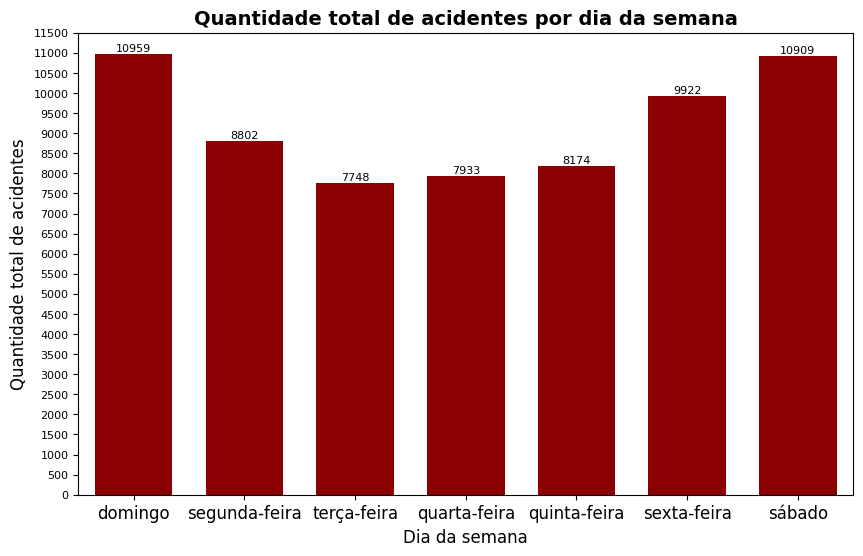

In [6]:
# Frêquencia de Distribuição - Dia da Semana

# Definindo a ordem dos dias da semana
ordem_dias_semana = ['domingo', 'segunda-feira', 'terça-feira', 'quarta-feira', 'quinta-feira', 'sexta-feira', 'sábado']

# Convertendo a coluna "dia_semana" em uma categoria ordenada
data['dia_semana'] = data['dia_semana'].astype(pd.CategoricalDtype(categories=ordem_dias_semana, ordered=True))

# Agrupando o dataframe por dia da semana e a soma da quantidade de acidentes
# Como a coluna "pessoas" contém valores não nulos em todas as linhas, usamos essa coluna no argumento de count() para contar o número de linhas em cada grupo. 
# Há outras formas de realizar essa contagem por grupo.
acidentes_por_dia = data.groupby('dia_semana').count()['pessoas']

# criando o gráfico de barras para a quantidade total de acidentes por dia da semana
fig, ax = plt.subplots()
acidentes_por_dia.plot(kind='bar', ax=ax, color='darkred', width=0.7)

# definindo o título e os labels do gráfico
plt.title('Quantidade total de acidentes por dia da semana', fontsize=14, fontweight='bold')
plt.xlabel('Dia da semana', fontsize=12)
plt.ylabel('Quantidade total de acidentes', fontsize=12)

# ajustando os limites dos eixos
ax.set_ylim([0, acidentes_por_dia.max()+100])
ax.set_xlim([-0.5, len(acidentes_por_dia)-0.5])

# ajustando eixos
ax.tick_params(axis='x', rotation=0, labelsize=12)
ax.tick_params(axis='y', rotation=0, labelsize=8)
ax.set_yticks(np.arange(0, acidentes_por_dia.max()+1000, 500))

# adicionando o valor total em cada barra
for i, v in enumerate(acidentes_por_dia):
    ax.text(i, v+150, str(v), color='black', ha='center', va='center', fontsize=8)

# exibindo o gráfico
plt.gcf().set_size_inches(10, 6)
plt.show()

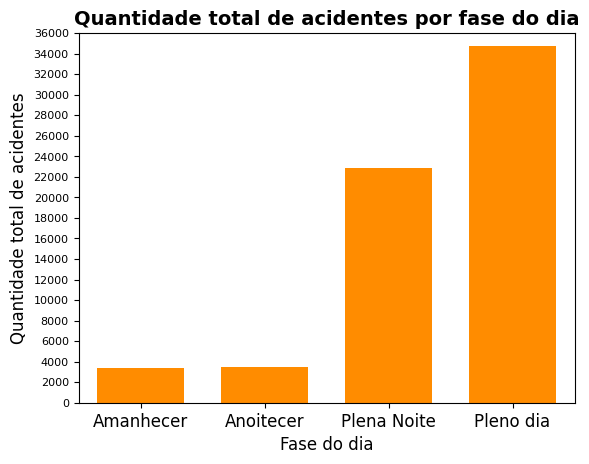

In [14]:
# Frêquencia de Distribuição - Fase do dia

# agrupando o dataframe por fase do dia e contando o número de acidentes
acidentes_por_fase = data.groupby('fase_dia').count()['pessoas']

# ordenando as fases do dia em ordem alfabética
acidentes_por_fase = acidentes_por_fase.sort_index()

# criando o gráfico de barras para a quantidade total de acidentes por fase do dia
fig, ax = plt.subplots()
acidentes_por_fase.plot(kind='bar', ax=ax, color='darkorange', width=0.7)

# definindo o título e os labels do gráfico
plt.title('Quantidade total de acidentes por fase do dia', fontsize=14, fontweight='bold')
plt.xlabel('Fase do dia', fontsize=12)
plt.ylabel('Quantidade total de acidentes', fontsize=12)

# ajustando os limites dos eixos
ax.set_ylim([0, acidentes_por_fase.max()+100])
ax.set_xlim([-0.5, len(acidentes_por_fase)-0.5])

# ajustando eixos
ax.tick_params(axis='x', rotation=0, labelsize=12)
ax.tick_params(axis='y', rotation=0, labelsize=8)
ax.set_yticks(np.arange(0, acidentes_por_fase.max()+2000, 2000))

# exibindo o gráfico
plt.show()

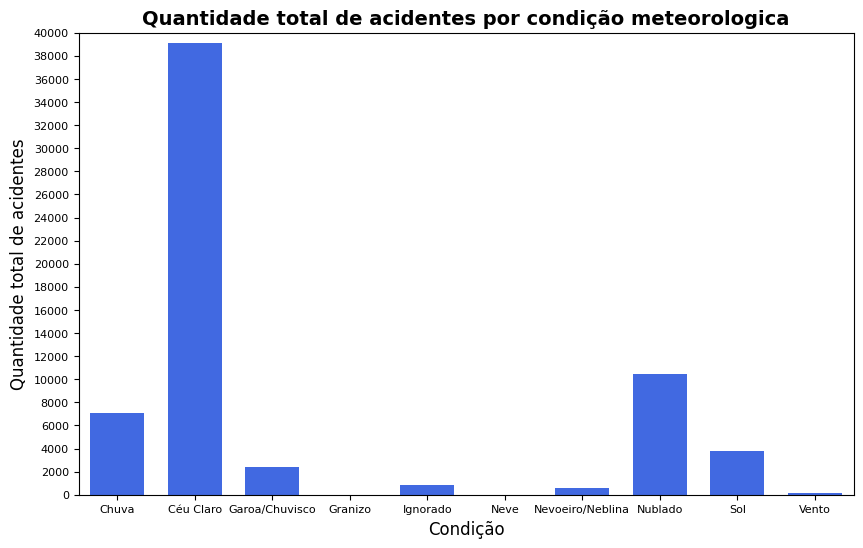

In [15]:
# Frêquencia de Distribuição - Condição Meterologica

# agrupando o dataframe por fase do dia e contando o número de acidentes
acidentes_por_condicao = data.groupby('condicao_metereologica').count()['pessoas']

# ordenando as fases do dia em ordem alfabética
acidentes_por_condicao = acidentes_por_condicao.sort_index()

# criando o gráfico de barras para a quantidade total de acidentes por fase do dia
fig, ax = plt.subplots()
acidentes_por_condicao.plot(kind='bar', ax=ax, color='royalblue', width=0.7)

# definindo o título e os labels do gráfico
plt.title('Quantidade total de acidentes por condição meteorologica', fontsize=14, fontweight='bold')
plt.xlabel('Condição', fontsize=12)
plt.ylabel('Quantidade total de acidentes', fontsize=12)

# ajustando os limites dos eixos
ax.set_ylim([0, acidentes_por_condicao.max()+100])
ax.set_xlim([-0.5, len(acidentes_por_condicao)-0.5])

# ajustando eixos
ax.tick_params(axis='x', rotation=0, labelsize=8)
ax.tick_params(axis='y', rotation=0, labelsize=8)
ax.set_yticks(np.arange(0, acidentes_por_condicao.max()+1000, 2000))

# exibindo o gráfico
plt.gcf().set_size_inches(10, 6)
plt.show()